# K-Means++ Clustering (Iris Species Prediction)

## Penjelasan Kolom

### 
- Id = Nomor Bunga Iris
- SepalLengthCm =  Panjang Kelopak Bunga
- SepalWidthCm =  Lebar Kelopak Bunga
- PetalLengthCm = Panjang Mahkota Bunga
- PetalWidthCm = Lebar Mahkota Bunga
- Species = Spesies Bunga Iris (Setosa/Versicolor/Virginica)

![iris](iris.png)

## A. Data Preparation

### A.1 Import Library

In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Membaca Data

In [647]:
try:
    df = pd.read_csv('Iris.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print(f"Gagal Membaca data as {e}")

Berhasil Membaca Data


### A.3 Membaca 5 data teratas dan 5 data terbawah

In [648]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [649]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### A.4 Melihat Informasi Data

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### A.5 Cek data duplikat

In [651]:
df.duplicated().sum()

np.int64(0)

### A.6 Cek Nilai yang hilang

In [652]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### A.7 Cek Nilai Outlier

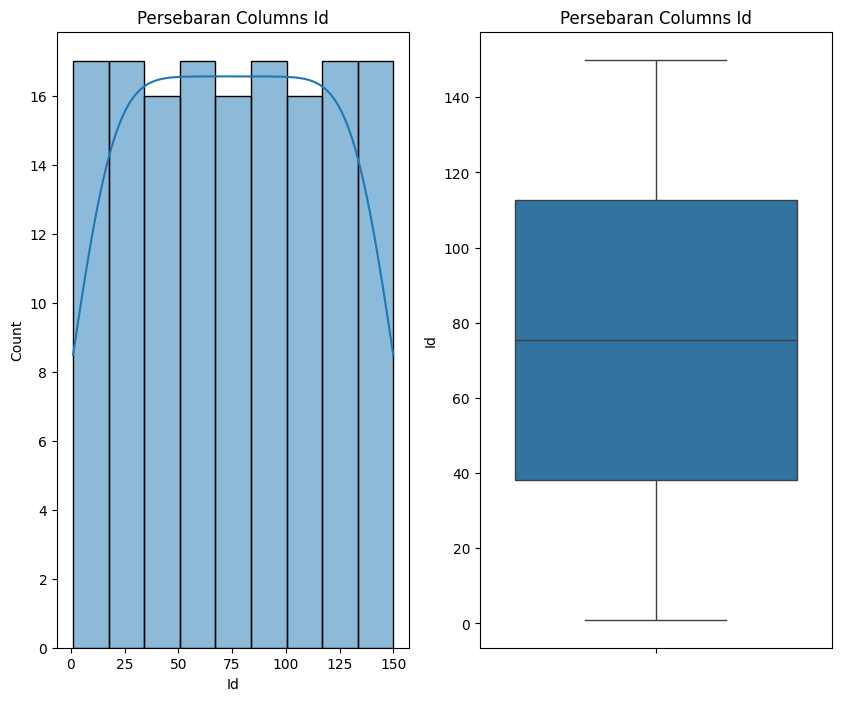

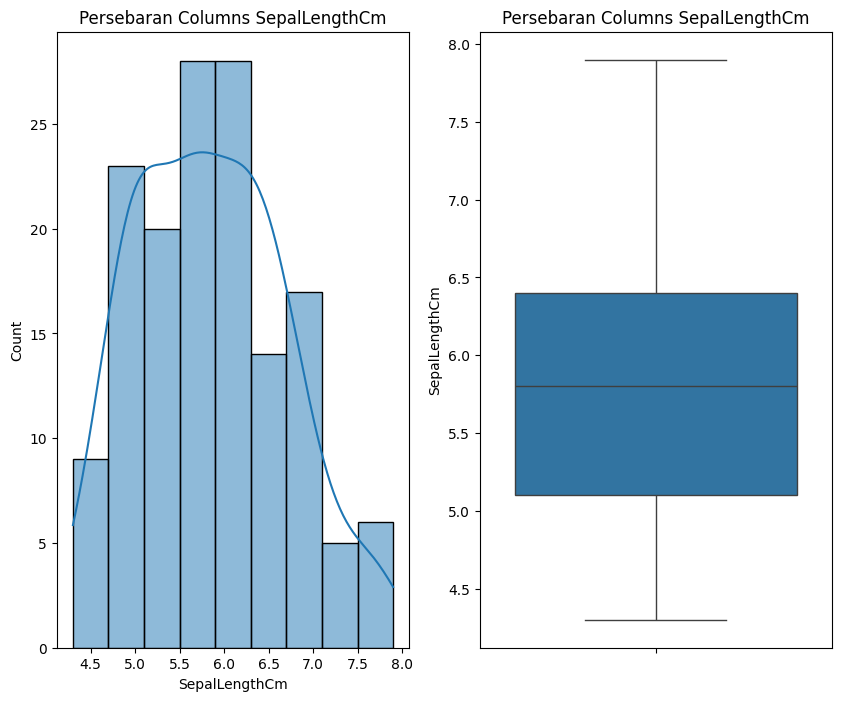

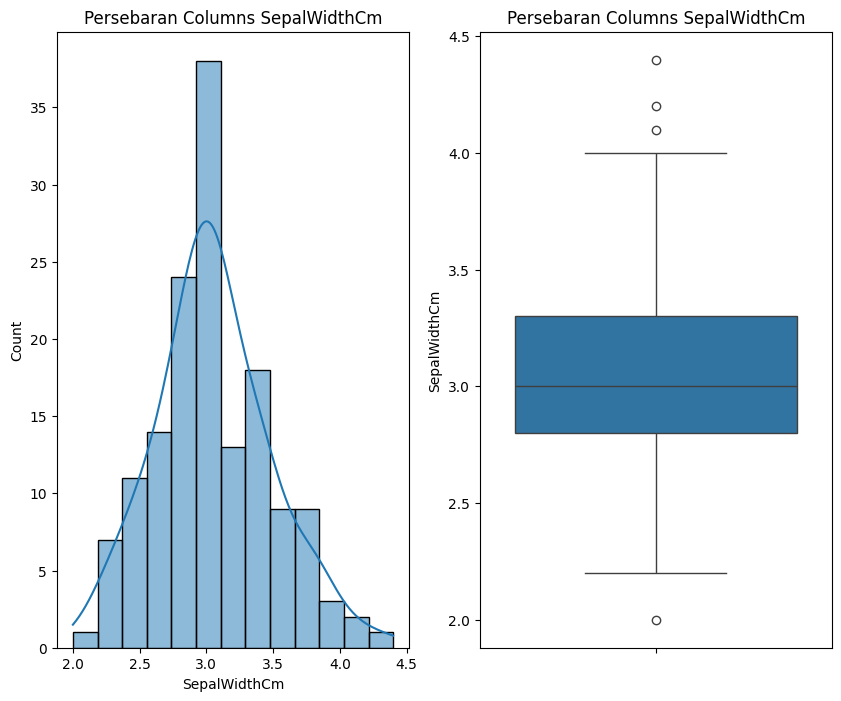

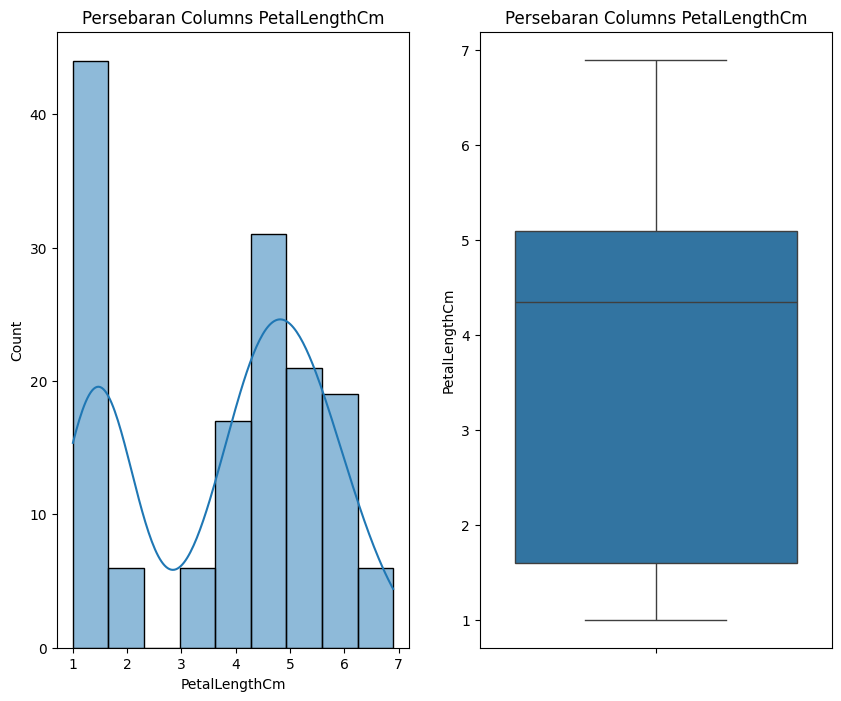

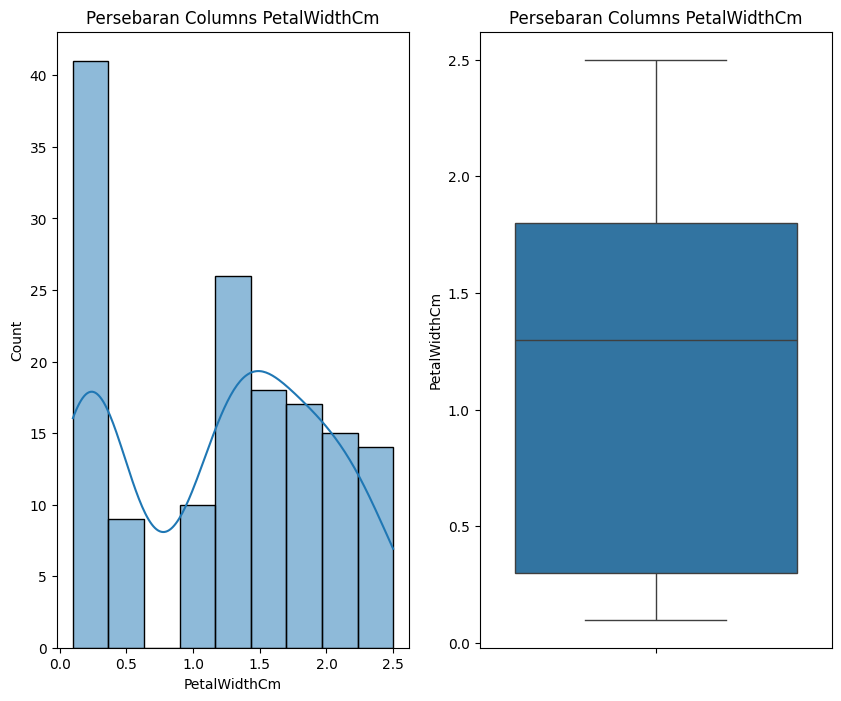

In [653]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col],kde = True, ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

### A.8 Cek Statistik Data

In [654]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Id,150.00,75.50,43.45,1.00,38.25,75.50,112.75,150.00
SepalLengthCm,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
SepalWidthCm,150.00,3.05,0.43,2.00,2.80,3.00,3.30,4.40
PetalLengthCm,150.00,3.76,1.76,1.00,1.60,4.35,5.10,6.90
PetalWidthCm,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


## B. Data Preprocessing

### B.1 Handling Outlier

In [655]:
# q1 = df['SepalWidthCm'].quantile(0.25)
# q3 = df['SepalWidthCm'].quantile(0.75)
# iqr = q3 -q1

# low = q1 - 1.5 * iqr
# up = q3 + 1.5 * iqr

# outlier = df[(df['SepalWidthCm'] < low) | (df['SepalWidthCm'] > up)]

In [656]:
# outlier

In [657]:
# df = df[(df['SepalWidthCm'] > low) & (df['SepalWidthCm'] < up)]

In [658]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

In [659]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

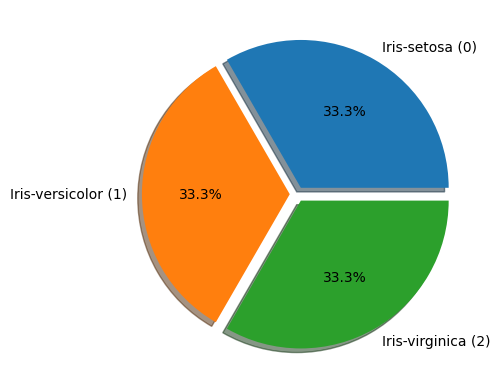

In [660]:
label = ['Iris-setosa (0)', 'Iris-versicolor (1)', 'Iris-virginica (2)']


df['Species'].value_counts().plot(
 kind='pie',
 labels = label,
 autopct='%1.1f%%',
 shadow = True,
 explode = (0.05, 0.05, 0.05),
 )

plt.ylabel("")
plt.show()

<Figure size 1400x1200 with 0 Axes>

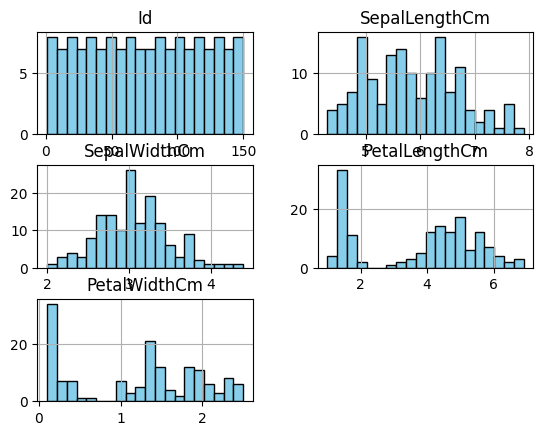

In [661]:
plt.figure(figsize=(14, 12))
df.select_dtypes(include='number').hist(bins =20, color='skyblue', edgecolor='black')
plt.show()

### C.2 Bivariate Analysis

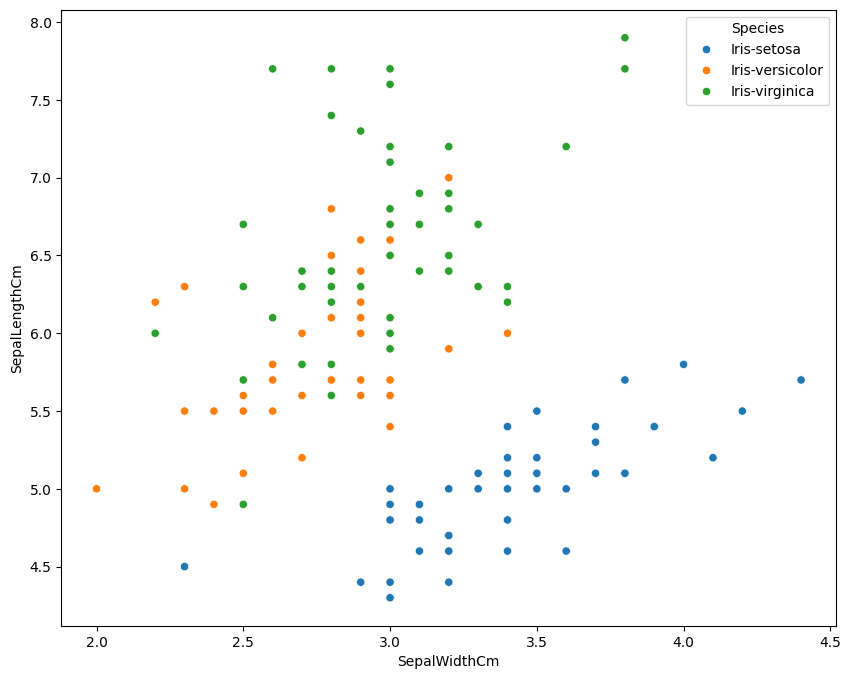

In [662]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')
plt.show()

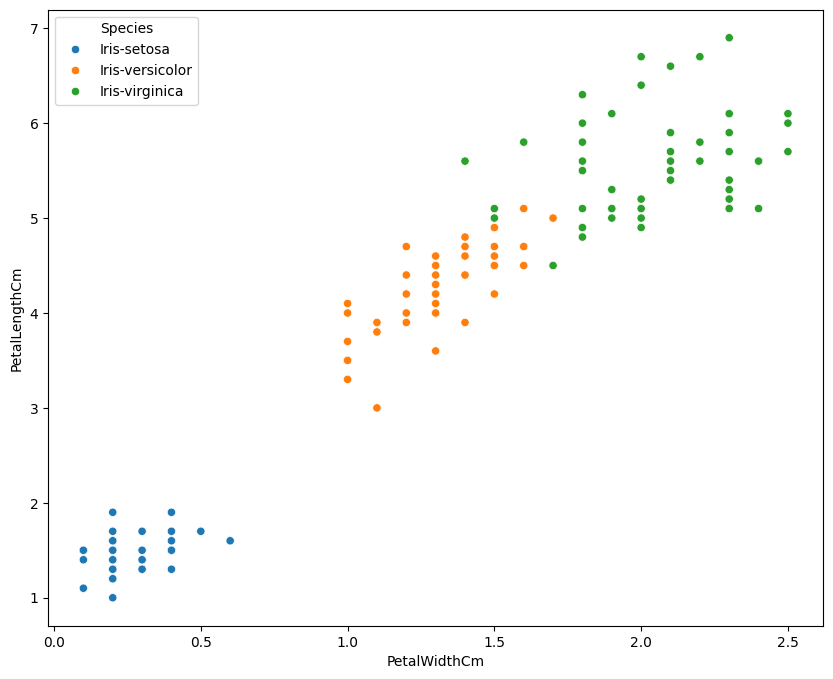

In [663]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.show()

### C.3 Multivariate Analysis

In [664]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [665]:
# mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

# df['Species'] = df['Species'].map(mapping) 

<Axes: >

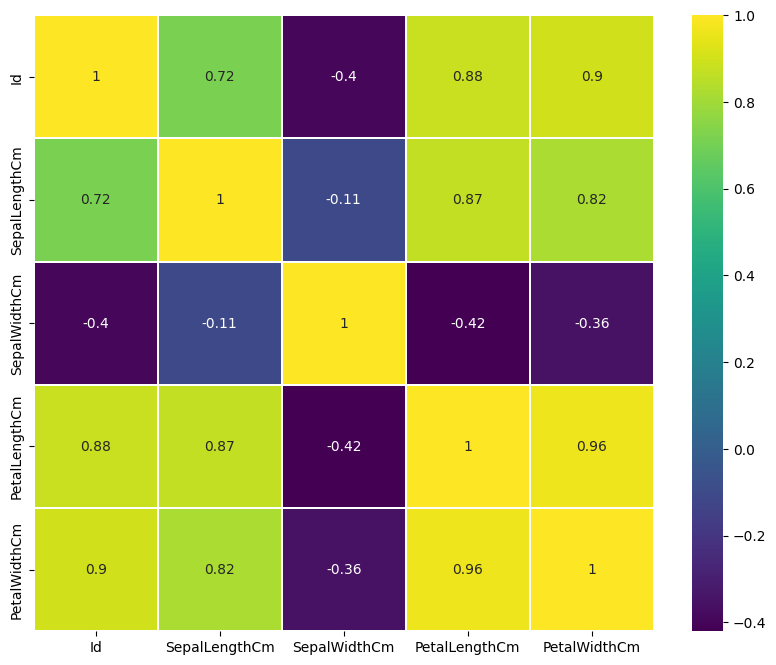

In [666]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),
annot = True,
cmap='viridis',
linewidth = 1.1)

## D. Modelling

### D.1 Standarisasi Fitur

In [667]:
features = df.drop(columns=['Id', 'Species'])

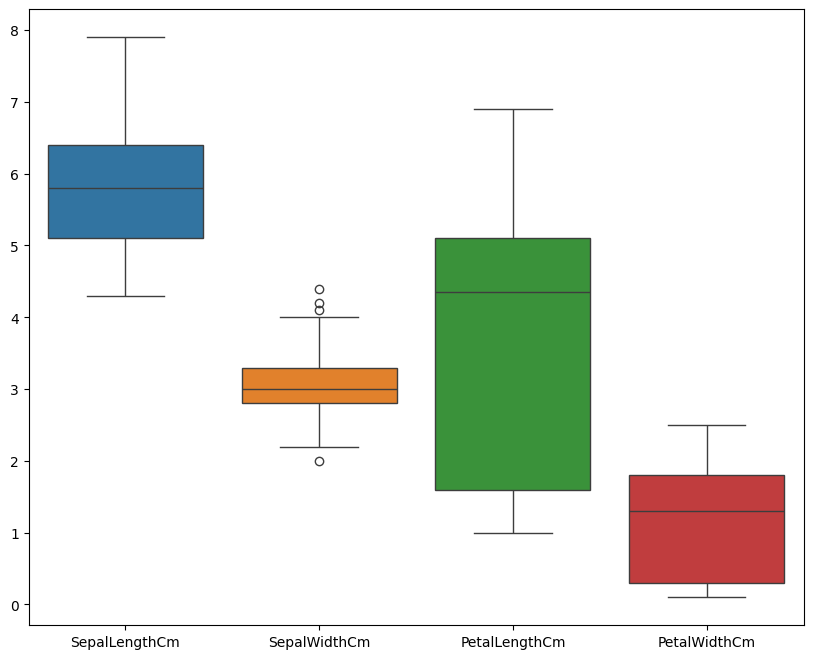

In [668]:
plt.figure(figsize=(10, 8))
sns.boxplot(features)
plt.show()

In [669]:
features = (features - features.mean(axis=0)) / features.std(axis=0)
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


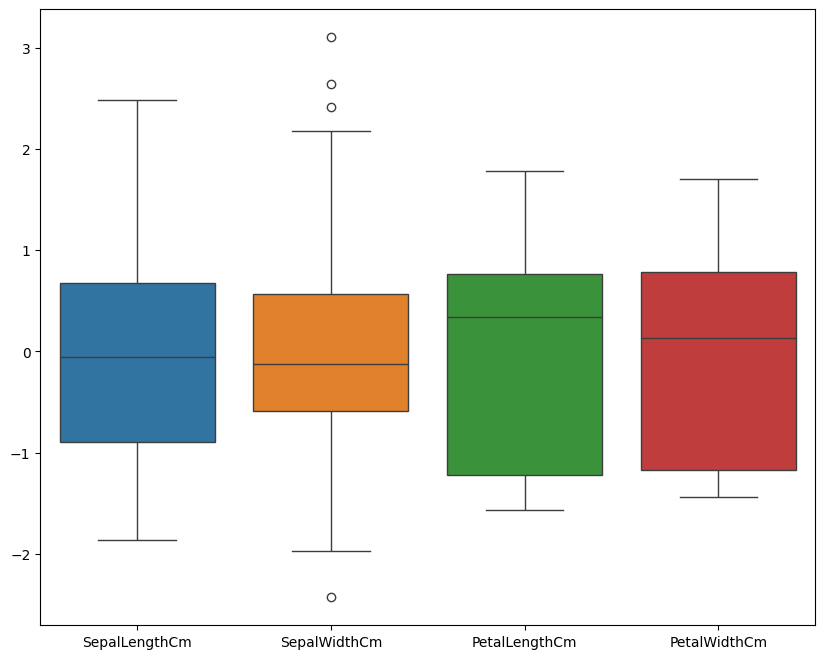

In [670]:
plt.figure(figsize=(10, 8))
sns.boxplot(features)
plt.show()

### D.2 Principal Component Analysis (PCA)

In [671]:
def pca_manual(X, n_components=2):
    cov_matrix = np.cov(X, rowvar=False)
    values, vectors = np.linalg.eig(cov_matrix)
    
    sorted_index = np.argsort(values)[::-1]
    sorted_vectors = vectors[:, sorted_index]
    
    subset_vectors = sorted_vectors[:, :n_components]
    X_reduced = np.dot(X, subset_vectors)
    
    return X_reduced, sorted_vectors

In [672]:
X_pca, sorted_vectors = pca_manual(features)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-2.256981,-0.504015
1,-2.079459,0.653216
2,-2.360044,0.317414
3,-2.296504,0.573447
4,-2.380802,-0.672514


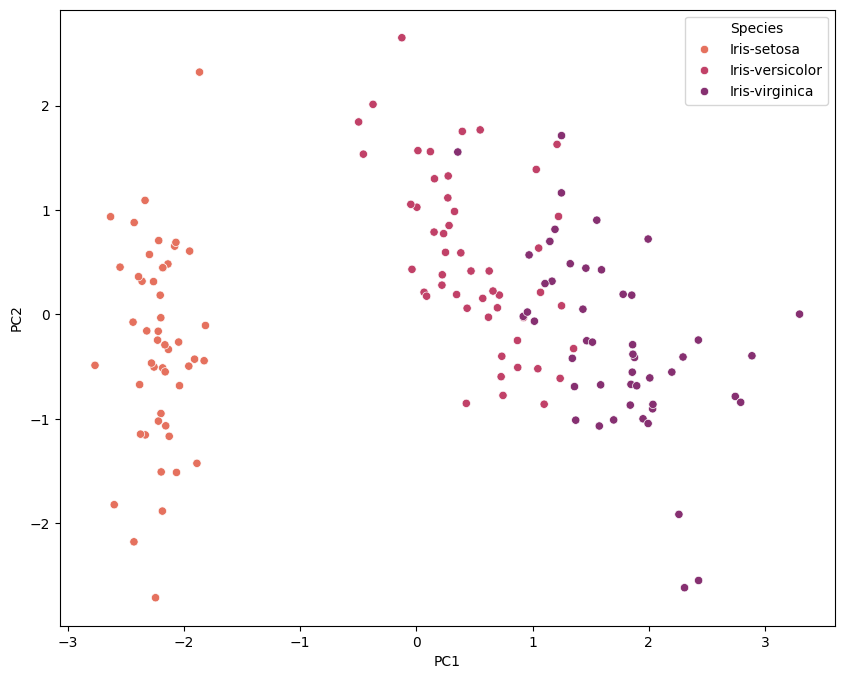

In [673]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df['Species'], palette='flare')
plt.show()

### D.3 K-Means++ 🤫🤫🤫🤫🤫

#### Inisialisasi Centroid K-Means++

In [674]:
def init_kmeans_plusplus(X, k, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    idx_acak = np.random.randint(0, n_samples)
    centroids = [X[idx_acak]]
    
    for i in range(k - 1):
        dists_sq = np.min(np.linalg.norm(X[:, None] - np.array(centroids), axis=2) ** 2, axis=1)
        probs = dists_sq / np.sum(dists_sq)
        next_centroids = X[np.random.choice(len(X), p=probs)]
        centroids.append(next_centroids)
    return np.array(centroids)

#### Iterasi & Konvergensi K-Means

In [675]:
def kmeans_plusplus(df, k, max_iter=1000, tol=1e-4):
    X = df.values
    centroids = init_kmeans_plusplus(X, k)
    
    for i in range(max_iter):
        euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(euclid, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

#### Kalkulasi Nilai Error WCSS

In [676]:
def calc_wcss(df, k):
    X = df.to_numpy()
    clusters, centroids = kmeans_plusplus(df, k)
    euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
    min_jarak = np.min(euclid, axis=1)
    wcss = np.sum(min_jarak ** 2)
    return wcss

In [677]:
calc_wcss(df_pca, 3)

np.float64(116.38198119991391)

#### Elbow Methods (Mencari K Terbaik)

In [678]:
def elbow_method(df, maxk = 10):
    wcss_values = []
    for k in range(1, maxk + 1):
        wcss = calc_wcss(df, k)
        wcss_values.append(wcss)
        
    plt.plot(range(1, maxk + 1), wcss_values, marker='o', linestyle='--')
    plt.title("Elbow Method")
    plt.ylabel("WCSS Error")
    plt.xlabel("Jumlah K")
    plt.show()

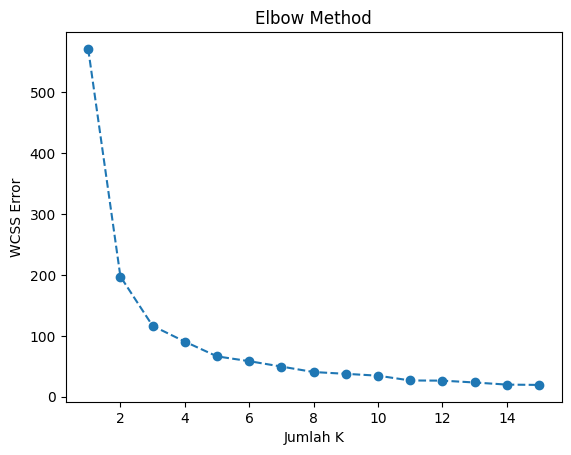

In [679]:
elbow_method(df_pca, 15)

## E. Evaluasi

### E.1 Silhouette Score

In [709]:
def calc_sscore(df, k):
    clusters, centroids = kmeans_plusplus(df, k)
    sscore = []
    
    for i in range(len(df)):
        ci = clusters[i]
        
        samecp = df[clusters == ci].to_numpy()
        ai = np.mean(np.linalg.norm(samecp - df.iloc[i].to_numpy(), axis = 1))
        
        distance_to_otherc = []
        for j in range(k):
            if j != ci:
                othercp = df[clusters == j].to_numpy()
                bi_temp = np.mean(np.linalg.norm(othercp - df.iloc[i].to_numpy(), axis = 1))
                distance_to_otherc.append(bi_temp)
                
        bi = np.min(distance_to_otherc)
        sscore_i = (bi - ai) / max(ai, bi)
        sscore.append(sscore_i)
    
    avg_mean = np.mean(sscore)
    return avg_mean

In [710]:
calc_sscore(df_pca, 3)

np.float64(0.5771328291498378)

### E.2 Visualisasi Silhouette Score

In [682]:
def silhouette_score(df, maxk = 10):
    sscore_values = []
    for k in range(2, maxk + 1):
        sscore = calc_sscore(df, k)
        sscore_values.append(sscore)
        
    plt.plot(range(2, maxk + 1), sscore_values, marker='o', linestyle='--')
    plt.title("Silhouette Score")
    plt.ylabel("Akurasi Silhouette")
    plt.xlabel("Jumlah K")
    plt.show()

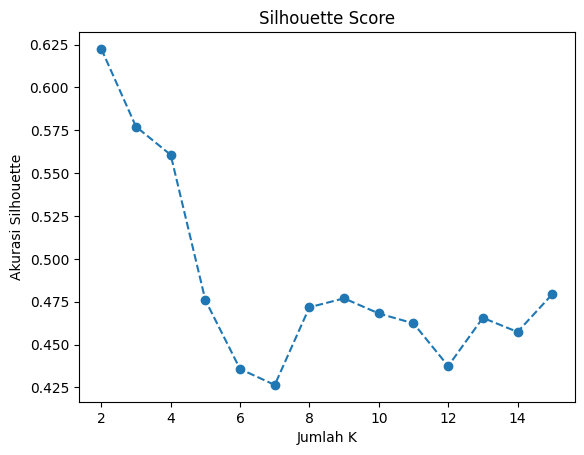

In [711]:
silhouette_score(df_pca, 15)

### E.3 Visualisasi Clusters

In [684]:
clusters, centroids = kmeans_plusplus(df_pca, 3)

In [685]:
df_pca['clusters'] = clusters
df_pca.head()

,PC1,PC2,clusters
0,-2.256981,-0.504015,2
1,-2.079459,0.653216,2
2,-2.360044,0.317414,2
3,-2.296504,0.573447,2
4,-2.380802,-0.672514,2


#### Scatter Persebaran Cluster

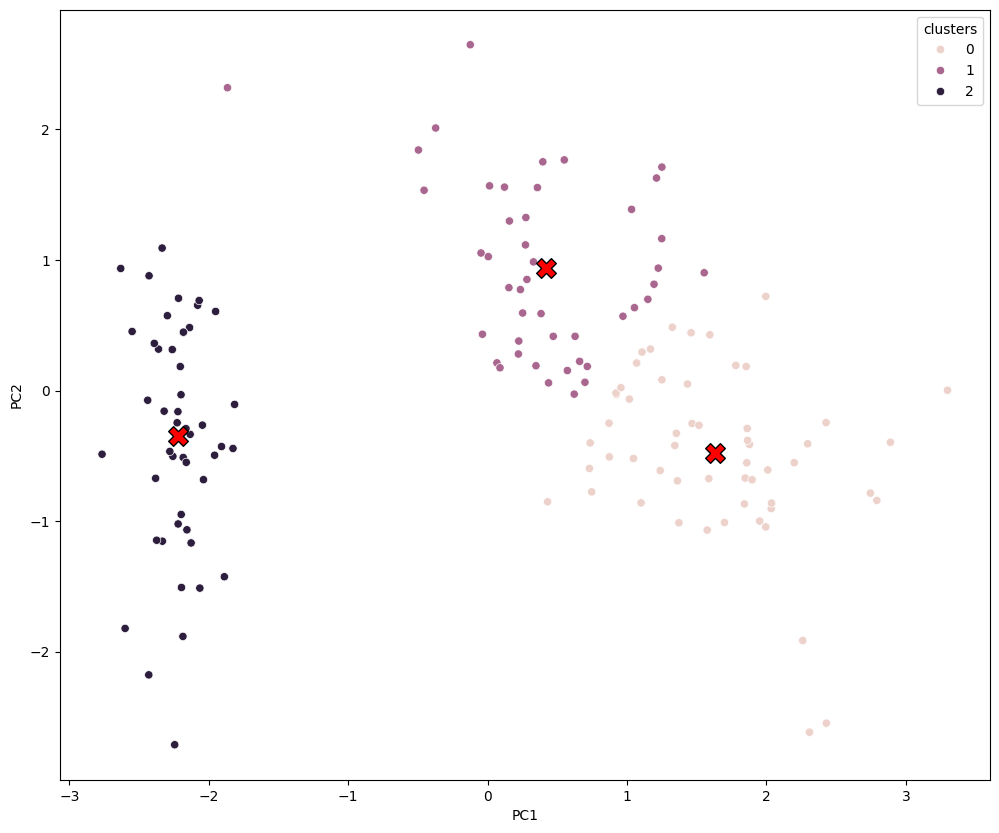

In [686]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clusters')
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c = 'red', marker='X', s=200,
    edgecolors = 'black'
)
plt.show()

#### Pie Chart Persebaran Cluster 

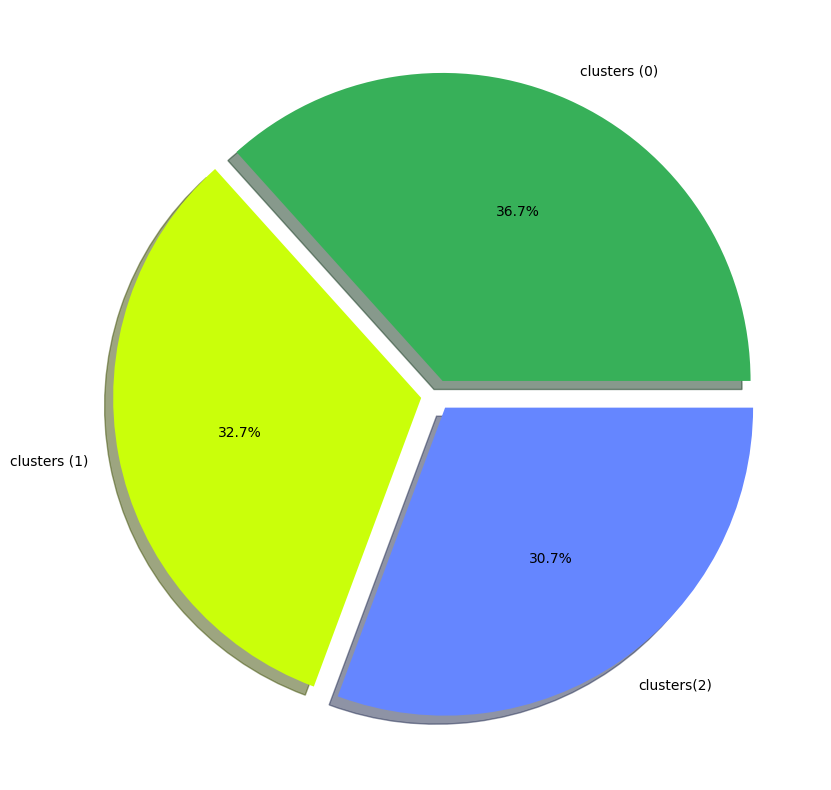

In [687]:
clusters = df_pca['clusters'].value_counts()
label = ['clusters (0)', 'clusters (1)', 'clusters(2)']

plt.figure(figsize=(12, 10))
plt.pie(clusters,
        labels = label,
        autopct="%1.1f%%",
        shadow=True,
        colors=("#37B059", "#CAFF0A", "#6586FF"),
        explode=(0.05, 0.05, 0.05))
plt.show()

In [688]:
clusters, centroids = kmeans_plusplus(df_pca, 3)
df['clusters'] = clusters
df.groupby('clusters')[['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm', 'SepalLengthCm']].mean()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
clusters,,,,
0,1.938182,5.418182,3.060000,6.696364
1,1.332609,4.215217,2.634783,5.704348
2,0.242857,1.467347,3.440816,5.016327


In [698]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [696]:
df[df['clusters'] == 1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
41,42,4.5,2.3,1.3,0.3,Iris-setosa,1
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,1
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,1
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,1
59,60,5.2,2.7,3.9,1.4,Iris-versicolor,1


In [697]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


## F.GUI

### F.1 Rumus Jarak Euclid

In [ ]:
# jarak = np.linalg.norm(X_pca - jarak_centroids, axis=1)
# hasil_cluster = np.argmin(jarak)

### F.2 GUI Tkinter

In [691]:
clusters, centroids = kmeans_plusplus(df_pca, 3)

In [713]:
import tkinter as tk
from tkinter import *

kolom_fitur = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
std_mean = df[kolom_fitur].mean(axis=0).to_numpy()
std_std = df[kolom_fitur].std(axis=0).to_numpy()

pca_vector = sorted_vectors[:, 2]
jarak_centroids = centroids

def prediksi():
    sepallen = float(input_sepallen.get())
    sepalwid = float(input_sepalwid.get())
    petallen = float(input_petallen.get())
    petalwid = float(input_petalwid.get())
    
    X_input = np.array([sepallen, sepalwid, petallen, petalwid])
    X_scaled = (X_input - std_mean) / std_std
    X_pca = np.dot(X_scaled, pca_vector)
    jarak = np.linalg.norm(X_pca - jarak_centroids, axis=1)
    hasil_cluster = np.argmin(jarak)
    if hasil_cluster == 0:
        teks_hasil = "Iris Virginica"
        warna = "#6145ff"
    elif hasil_cluster == 1:
        teks_hasil = "Iris Versicolor"
        warna = "#892aa1"
    elif hasil_cluster == 2:
        teks_hasil = "Iris Setosa"
        warna = "#7D1FEF"
    else:
        teks_hasil = "Input Angka Yang Valid"
        warna ='red'
    hasil_predict.config(text=f"{teks_hasil}", fg=f"{warna}")
    

root = tk.Tk()
root.title("K-Means++ Clustering")
root.config(bg="#762aac")
root.geometry("400x500")

Header = Frame(root, bg="#af81cf")
Header.pack(fill=X)
Judul = Label(Header, text="Iris Species Predictor",bg="#af81cf", fg="white", font=("Arial", 18, "bold"))
Judul.pack(pady=(20,10))
Deskripsi = Label(Header, text="K-Means++ Clustering",bg="#af81cf", fg="white", font=("Arial", 12, "bold"))
Deskripsi.pack(pady=(0, 20))

Main = Frame(root, bg="#7b648c")
Main.pack(padx= 30, pady = 30)

Label(Main, text="Panjang Sepal (Cm)", bg="#7b648c", fg="white", font=("Arial", 10, "bold")).pack()
input_sepallen = Entry(Main, width=50)
input_sepallen.pack()

Label(Main, text="Lebar Sepal (Cm)", bg="#7b648c", fg="white", font=("Arial", 10, "bold")).pack()
input_sepalwid = Entry(Main, width=50)
input_sepalwid.pack()

Label(Main, text="Panjang Petal (Cm)", bg="#7b648c", fg="white", font=("Arial", 10, "bold")).pack()
input_petallen = Entry(Main, width=50)
input_petallen.pack()

Label(Main, text="Lebar Petal (Cm)", bg="#7b648c", fg="white", font=("Arial", 10, "bold")).pack()
input_petalwid = Entry(Main, width=50)
input_petalwid.pack()

Hasil = Frame(root, bg="#7b648c")
Hasil.pack()
btn_predict = Button(Hasil, text="Prediksi Spesies", command=prediksi, bg="#af81cf", fg="white")
btn_predict.pack()
hasil_predict = Label(text="-", font=("Arial", 10, "bold"), fg="black")
hasil_predict.pack(pady=10)

root.mainloop()